In [ ]:
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
x=2*np.random.rand(100,1)
y=3+3*np.random.rand(100,1)

In [ ]:
X_b = np.c_[np.ones((100, 1)), x]

In [ ]:
x_b=np.stack((np.ones((100,1)).flatten().reshape(x.shape),x),axis=1).flatten().reshape(100,2)

In [ ]:
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [ ]:
theta_best

array([[4.20778605],
       [0.12814264]])

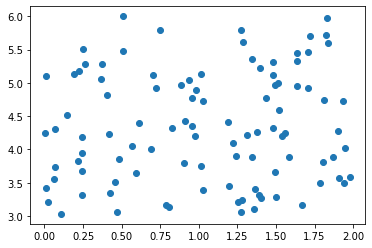

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x,y)

In [ ]:
x_new=np.array([[0],[2]])
x_new_b=np.stack((np.ones((2,1)),x_new),axis=1).flatten().reshape(2,2)

In [ ]:
y_pred=x_new_b.dot(theta_best)

In [ ]:
y_pred

array([[4.20778605],
       [4.46407134]])

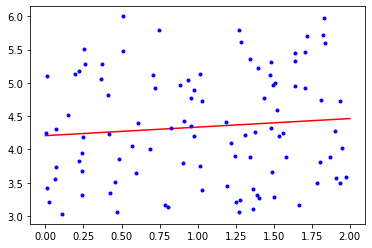

In [ ]:
plt.plot(x_new, y_pred, "r-")
plt.plot(x, y, "b.")

# Performing Linera Regression on the same set

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_clf=LinearRegression()
lin_clf.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_clf.predict(x_new)

array([[4.20778605],
       [4.46407134]])

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)

In [ ]:
theta_best_svd

array([[4.20778605],
       [0.12814264]])

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.20778605],
       [0.12814264]])

# Gradient Descent 

In [ ]:
eta=0.1
n_iterations=1000
m=100

In [ ]:
theta=np.random.randn(2,1)

In [ ]:
for iteration in range(n_iterations):
  gradients=2/m*x_b.T.dot(x_b.dot(theta)-y)
  theta=theta-eta*gradients

In [ ]:
theta

array([[4.20778605],
       [0.12814264]])

# Stochastic Gradient Descent Basic

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
  return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi,yi = x_b[random_index:random_index+1],y[random_index:random_index+1]
    gradients=2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.25438692],
       [0.15757953]])

# Stochastic Gradient Descent Using sklearn

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.18663573]), array([0.15292448]))

# Polynomial regresssion

In [ ]:
m,x,y=100,6*np.random.randn(m,1)-3,0.5*+x**2+x+2+np.random.randn(m,1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
x_poly=poly_features.fit_transform(x)

In [ ]:
x[0]

array([5.14149632])

In [ ]:
x_poly[0]

array([ 5.14149632, 26.43498445])

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_reg.coef_,lin_reg.intercept_

(array([[-0.02781903, -0.00111284]]), array([3.63629409]))

# Learning Curve

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curve(model,x,y):
  x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
  train_errors,val_errors=[],[]
  for m in range(1,len(x_train)):
    model.fit(x_train[:m],y_train[:m])
    y_train_pred=model.predict(x_train[:m])
    y_val_pred=model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
    val_errors.append(mean_squared_error(y_val, y_val_pred))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

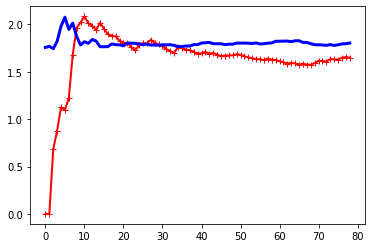

In [ ]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, x, y)

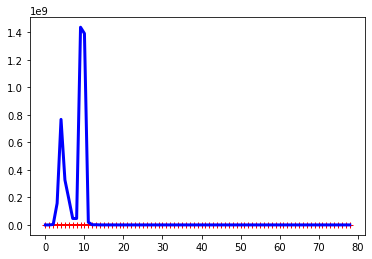

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),])
plot_learning_curve(polynomial_regression, x, y)

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(x,y)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [ ]:
ridge_reg.predict([[1.5]])

array([[3.5787821]])

In [ ]:
# Check result using sgd 
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.predict([[1.5]])

array([3.45704784])

# Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso_reg.predict([[1.5]])

array([3.58828209])

In [ ]:
# You can also use SGDRegression with penalty =l1 
sgd_reg=SGDRegressor(penalty="l1")
sgd_reg.fit(x,y.ravel())


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.predict([[1.5]])

array([3.50724137])

# Elastic Net 

In [ ]:
from sklearn.linear_model import ElasticNet
net_reg=ElasticNet(alpha=0.1,l1_ratio=0.5)
net_reg.fit(x,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
net_reg.predict([[1.5]])

array([3.58360092])

# Early Stopping 

In [ ]:
# prepare the data
from sklearn.preprocessing import StandardScaler
poly_scaler = Pipeline([
("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
("std_scaler", StandardScaler())
])

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(x_train)
X_val_poly_scaled = poly_scaler.transform(x_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,penalty=None, learning_rate="constant", eta0=0.0005)

In [ ]:
from sklearn.base import clone
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train.ravel()) # continues where it left off
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

In [ ]:
best_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)

# Decision Boundaries

In [ ]:
from sklearn import datasets
iris=datasets.load_iris()

In [ ]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

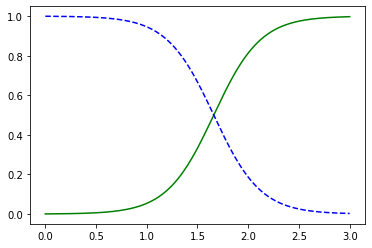

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])